In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


<div style="background-color:rgb(237, 237, 47); padding: 10px; border: 1px solid #ddd;">
  <p style="color: #333333;"><b>Seaborn</b></p>
</div>

In [4]:
sns.set_theme(style="whitegrid")

1. Histplot
2. Countplot
3. Barplot
4. Scatterplot
5. Heatmap
6. Boxplot
7. pairplot
8. kdeplot
9. catplot
10. JointGrid
11. FacetGrid
12. Regplot

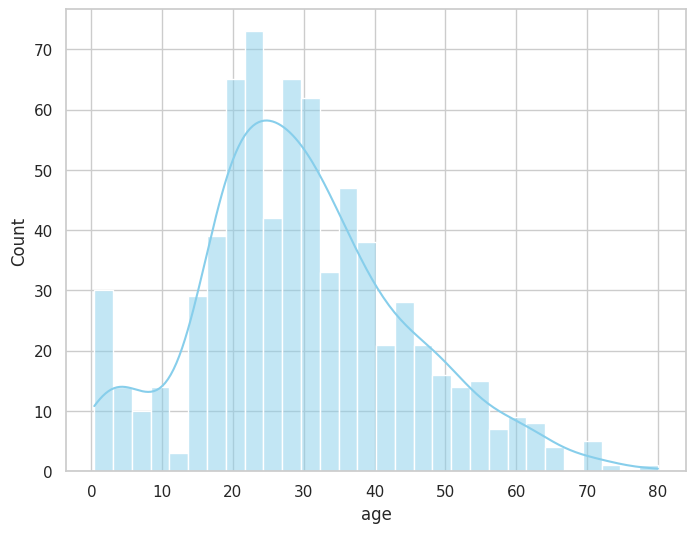

In [5]:
# 1) ⁡⁣⁢⁣Histplot⁡

plt.figure(figsize=(8,6))
sns.histplot(titanic['age'], bins=30, kde=True, color='skyblue')
plt.show()

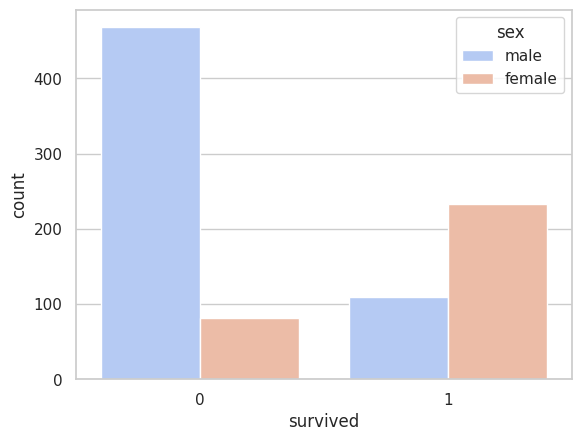

In [6]:
# 2) Countplot

sns.countplot(x='survived', data=titanic, palette='coolwarm', hue='sex')
plt.show()

/tmp/ipykernel_2238/3537931930.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='survived', data=titanic, palette='viridis')


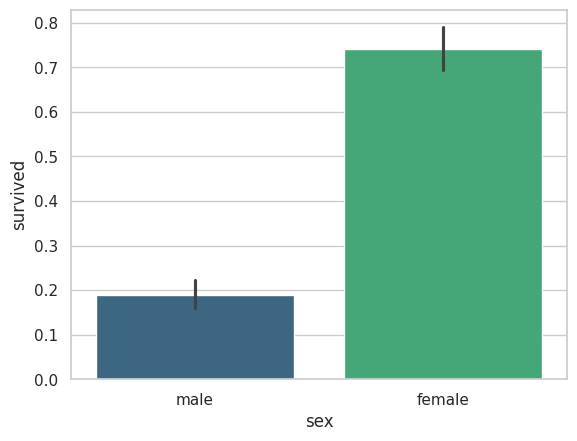

In [7]:
# 3) barplot

sns.barplot(x='sex', y='survived', data=titanic, palette='viridis')
plt.show()

<Axes: xlabel='age', ylabel='fare'>

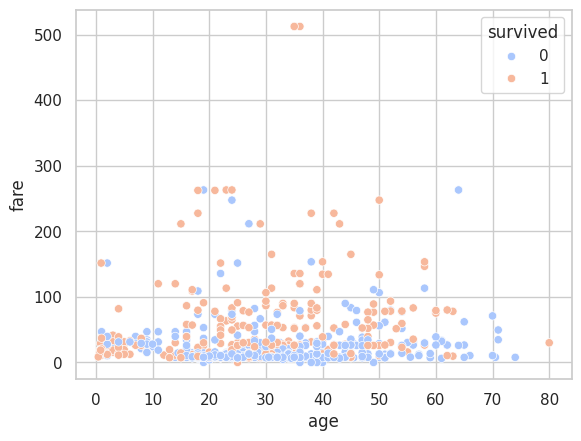

In [8]:
# 4) Scatter Plot

sns.scatterplot(x='age', y='fare', data=titanic, hue='survived', palette='coolwarm') 

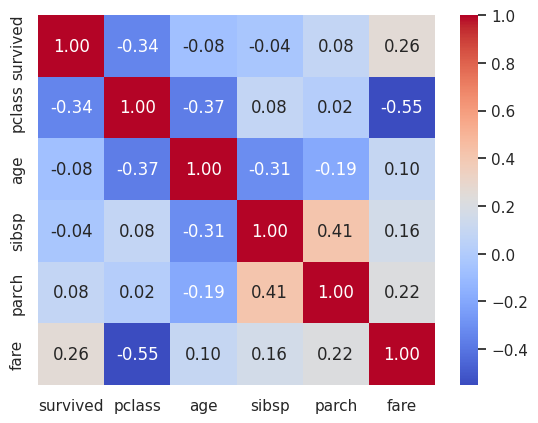

In [9]:
# 5) heatmap

numeric_cols = titanic.select_dtypes(include=['int64','float64'])
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

/tmp/ipykernel_2238/2300843301.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')


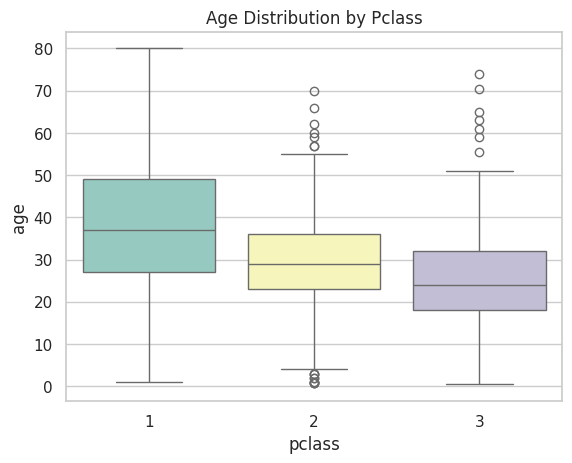

In [10]:
# 6) Boxplot

sns.boxplot(x='pclass', y='age', data=titanic, palette='Set3')
plt.title("Age Distribution by Pclass")
plt.show()

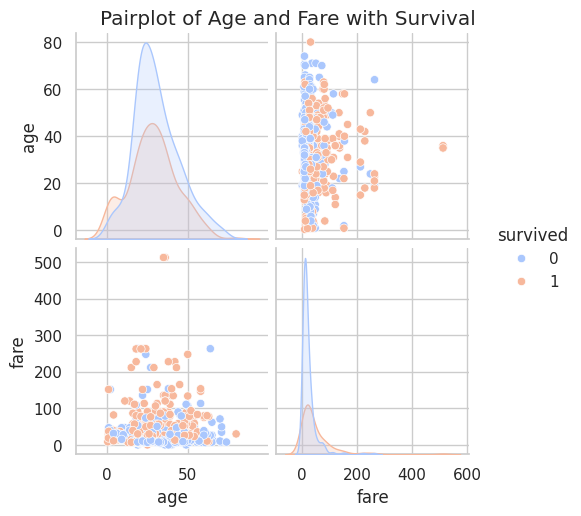

In [11]:
# 7) Pairplot

sns.pairplot(titanic, hue='survived', vars=['age', 'fare'], palette='coolwarm')
plt.suptitle("Pairplot of Age and Fare with Survival", y=1.02)
plt.show()


/tmp/ipykernel_2238/303843421.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 1]['age'], color='green', label='Survived', shade=True)
/tmp/ipykernel_2238/303843421.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic[titanic['survived'] == 0]['age'], color='red', label='Did Not Survive', shade=True)


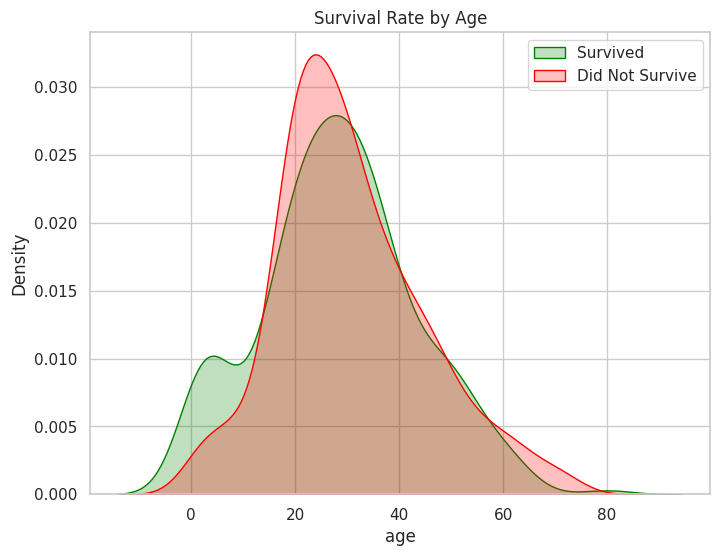

In [12]:
# 8) KDE plot 

plt.figure(figsize=(8, 6))
sns.kdeplot(titanic[titanic['survived'] == 1]['age'], color='green', label='Survived', shade=True)
sns.kdeplot(titanic[titanic['survived'] == 0]['age'], color='red', label='Did Not Survive', shade=True)
plt.title("Survival Rate by Age")
plt.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

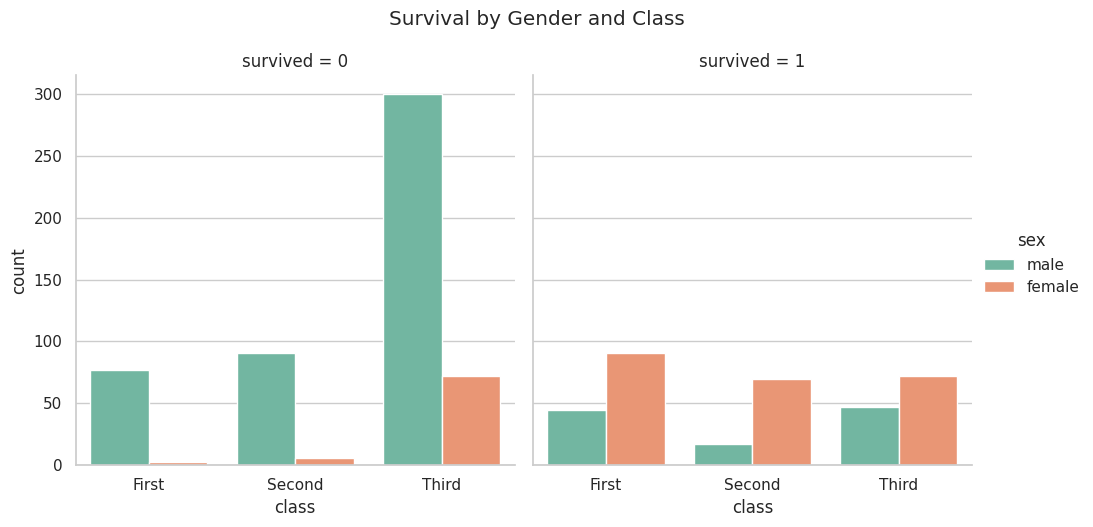

In [13]:
# 9) Catplot

plt.figure(figsize=(8, 6))
sns.catplot(x='class', hue='sex', col='survived', data=titanic, kind='count', palette='Set2', height=5, aspect=1)
plt.suptitle("Survival by Gender and Class", y=1.05)
plt.show()


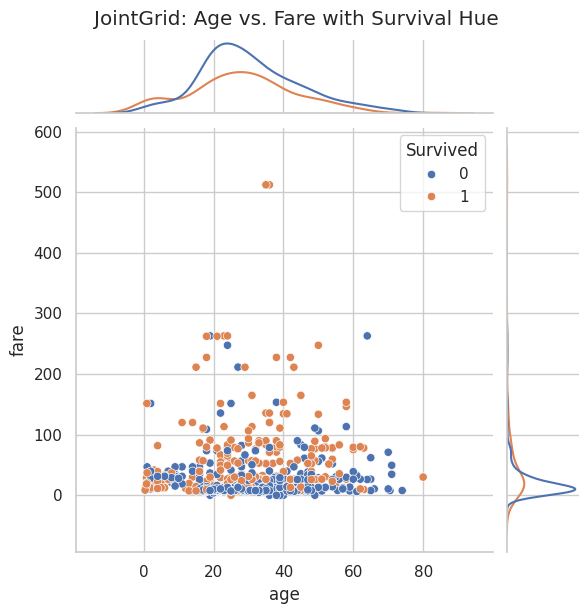

In [14]:

# 10) JointGrid 
g = sns.JointGrid(data=titanic, x="age", y="fare", hue="survived")
g.plot(sns.scatterplot, sns.kdeplot)
g.ax_joint.legend(loc="upper right", title="Survived")
plt.suptitle("JointGrid: Age vs. Fare with Survival Hue", y=1.02)
plt.show()


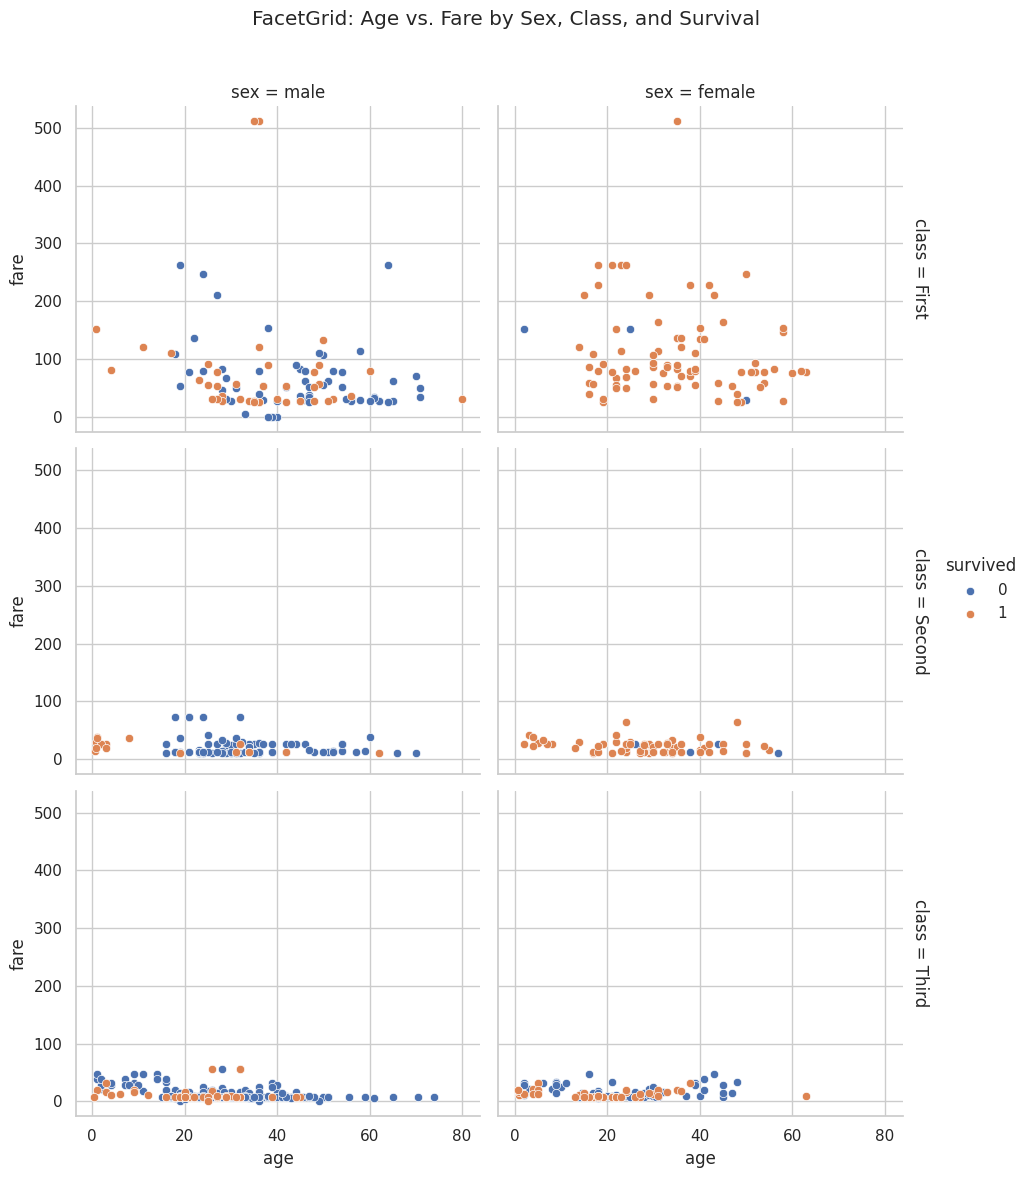

In [15]:
# 11) Facet Grid

# FacetGrid for Survival by Gender and Class
g = sns.FacetGrid(titanic, col="sex", row="class", hue="survived", margin_titles=True, height=4, aspect=1.2)
g.map(sns.scatterplot, "age", "fare", alpha=1)
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("FacetGrid: Age vs. Fare by Sex, Class, and Survival")
plt.show()


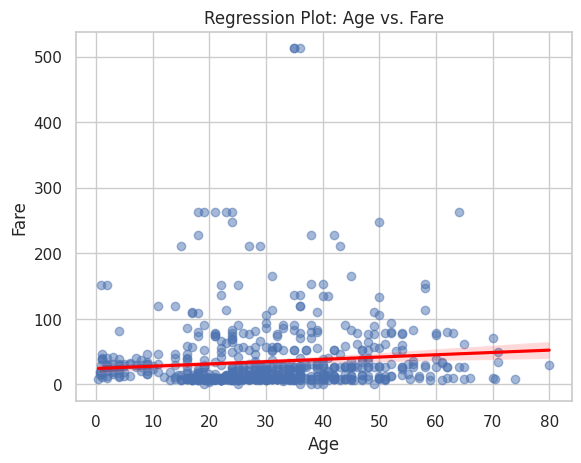

In [16]:
# 12) Regression Plot for Age vs Fare
sns.regplot(x="age", y="fare", data=titanic, scatter_kws={"alpha": 0.5}, line_kws={"color": "red"})
plt.title("Regression Plot: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()


<div style="background-color: #FFFFE0; padding: 10px; border: 1px solid #ddd;">
  <p style="color: #333333;"><b>Matplotlib</b></p>
</div>

1. Histogram
2. Bar plot
3. Pie Chart
4. Line plot
5. Box plot
6. Scatter
7. groupby then plot
8. KDE
9. Heatmap
10. Horizontal Bar plot
11. Stacked Bar chart
12. Violin plot
13. value_counts plot
14. Bubble chart

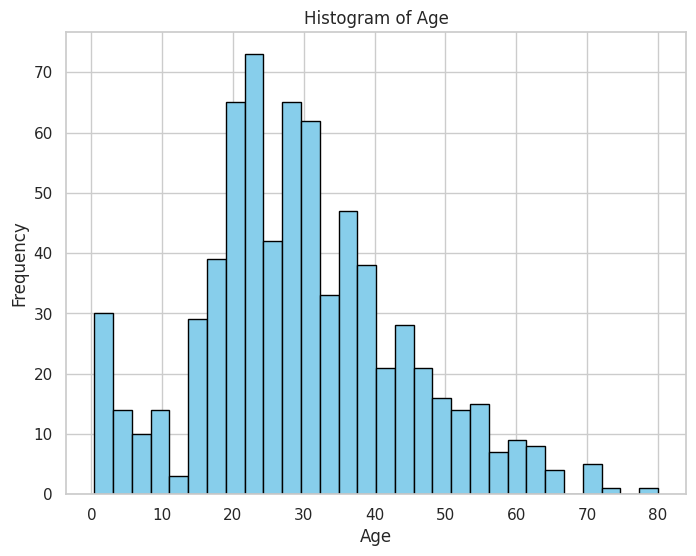

In [17]:
# 1. Histogram of Age
plt.figure(figsize=(8, 6))
plt.hist(titanic['age'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title("Histogram of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

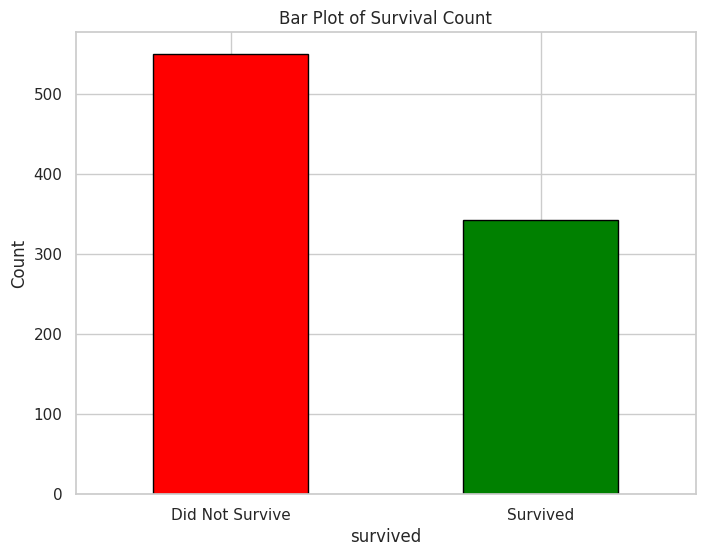

In [18]:
# 2. Bar Plot of Survival Count
plt.figure(figsize=(8, 6))
titanic['survived'].value_counts().plot(kind='bar', color=['red', 'green'], edgecolor='black')
plt.title("Bar Plot of Survival Count")
plt.xticks([0, 1], ['Did Not Survive', 'Survived'], rotation=0)
plt.ylabel("Count")
plt.show()

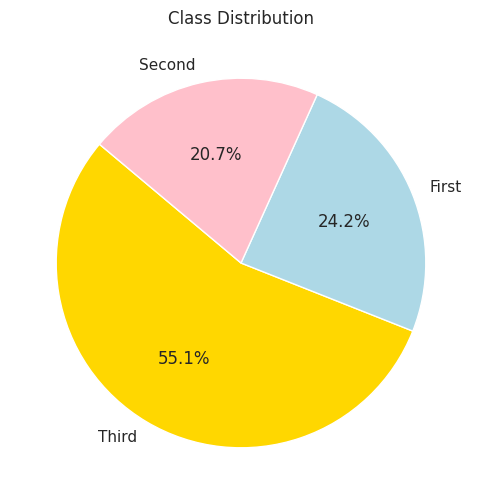

In [19]:
# 3. Pie Chart of Class Distribution
plt.figure(figsize=(8, 6))
titanic['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'pink'])
plt.title("Class Distribution")
plt.ylabel("")
plt.show()

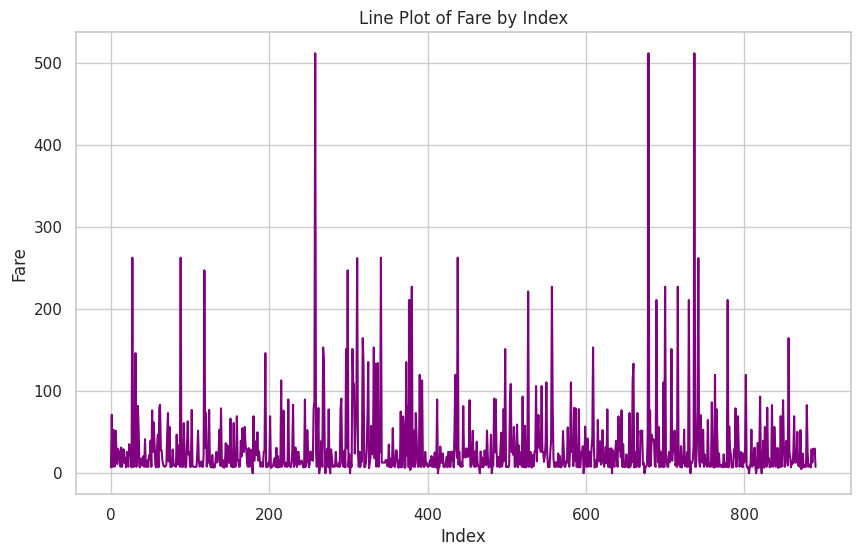

In [20]:
# 4. Line Plot of Fare by Index
plt.figure(figsize=(10, 6))
plt.plot(titanic['fare'], color='purple')
plt.title("Line Plot of Fare by Index")
plt.xlabel("Index")
plt.ylabel("Fare")
plt.show()

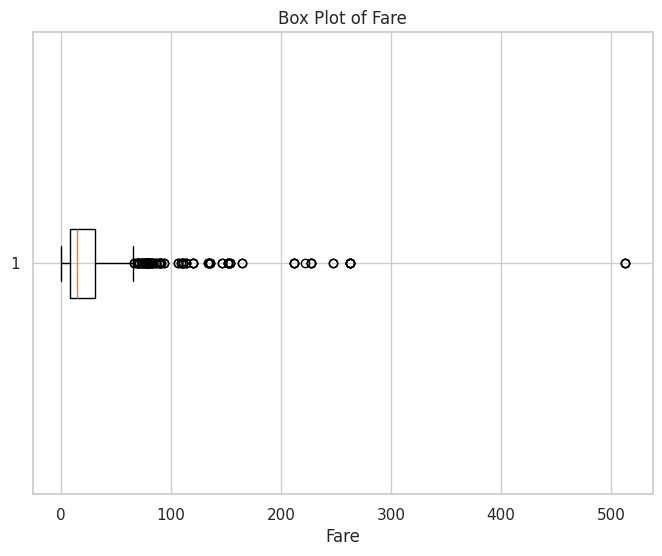

In [21]:
# 5. Box Plot of Fare
plt.figure(figsize=(8, 6))
plt.boxplot(titanic['fare'].dropna(), vert=False)
plt.title("Box Plot of Fare")
plt.xlabel("Fare")
plt.show()

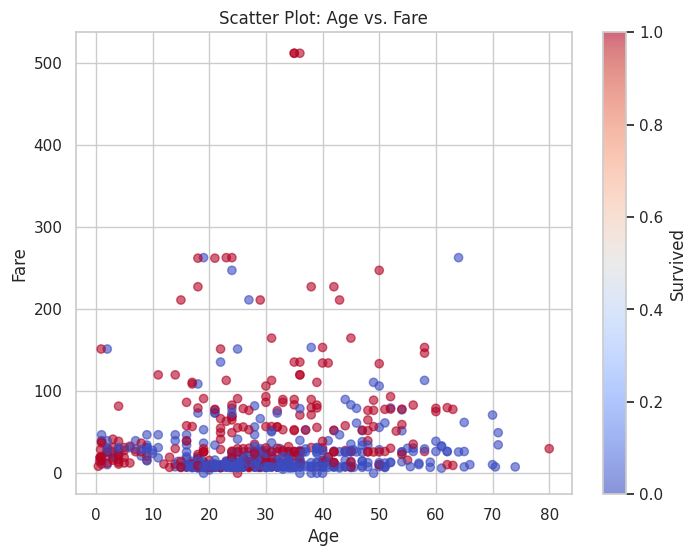

In [22]:
# 6. Scatter Plot: Age vs. Fare
plt.figure(figsize=(8, 6))
plt.scatter(titanic['age'], titanic['fare'], alpha=0.6, c=titanic['survived'], cmap='coolwarm')
plt.colorbar(label="Survived")
plt.title("Scatter Plot: Age vs. Fare")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

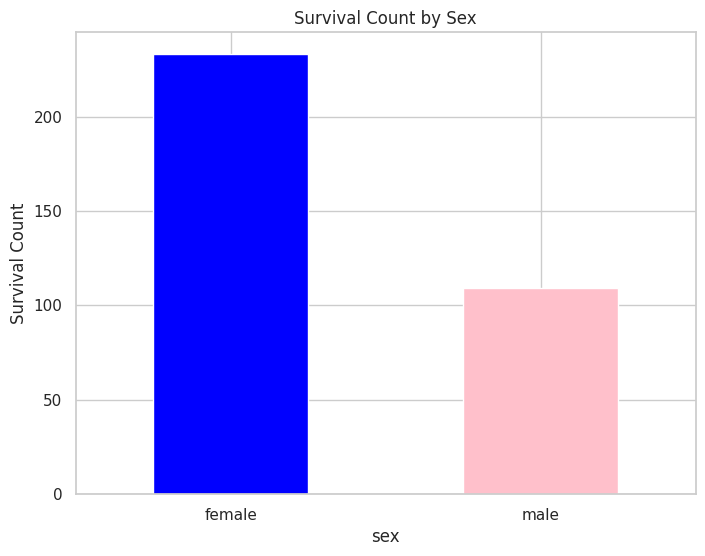

In [23]:
# 7. Survival Count by Sex (Bar Plot)
plt.figure(figsize=(8, 6))
titanic.groupby('sex')['survived'].sum().plot(kind='bar', color=['blue', 'pink'])
plt.title("Survival Count by Sex")
plt.ylabel("Survival Count")
plt.xticks(rotation=0)
plt.show()

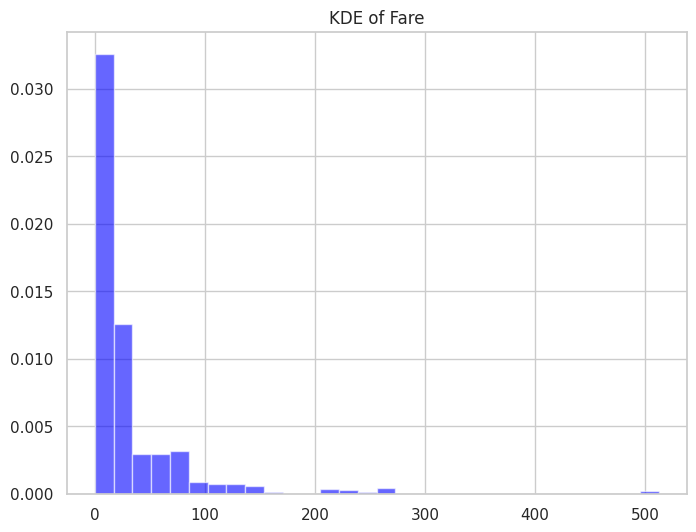

In [24]:
# 8. KDE Plot of Fare
plt.figure(figsize=(8, 6))
plt.hist(titanic['fare'], bins=30, color='blue', density=True, alpha=0.6)
plt.title("KDE of Fare")
plt.show()

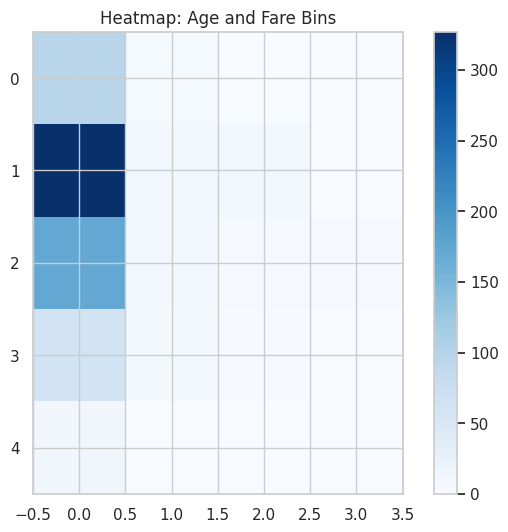

In [25]:
# 9. Heatmap of Age and Fare Bins
age_bins = pd.cut(titanic['age'], bins=5)
fare_bins = pd.cut(titanic['fare'], bins=5)
cross_tab = pd.crosstab(age_bins, fare_bins)
plt.figure(figsize=(8, 6))
plt.imshow(cross_tab, cmap="Blues", interpolation="nearest")
plt.title("Heatmap: Age and Fare Bins")
plt.colorbar()
plt.show()

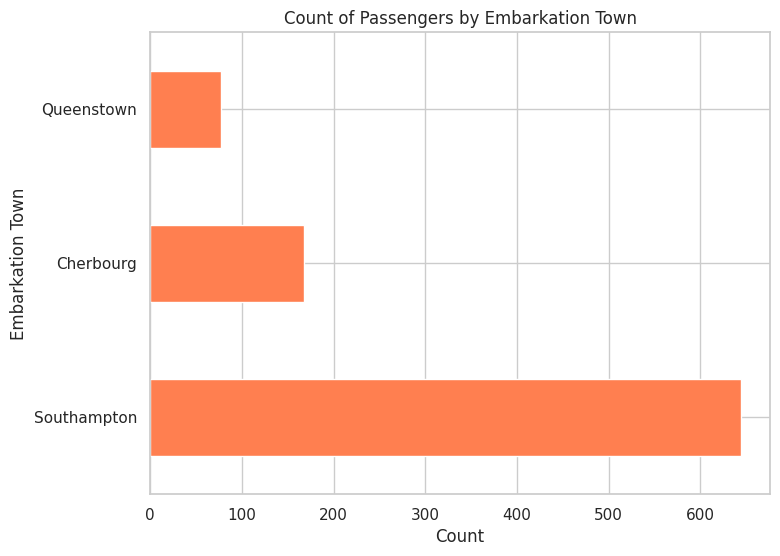

In [26]:
# 10. Horizontal Bar Plot of Embarkation Town
plt.figure(figsize=(8, 6))
titanic['embark_town'].value_counts().plot(kind='barh', color='coral')
plt.title("Count of Passengers by Embarkation Town")
plt.xlabel("Count")
plt.ylabel("Embarkation Town")
plt.show()

/tmp/ipykernel_2238/3995811243.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_class = titanic.groupby(['class', 'survived'])['survived'].count().unstack()


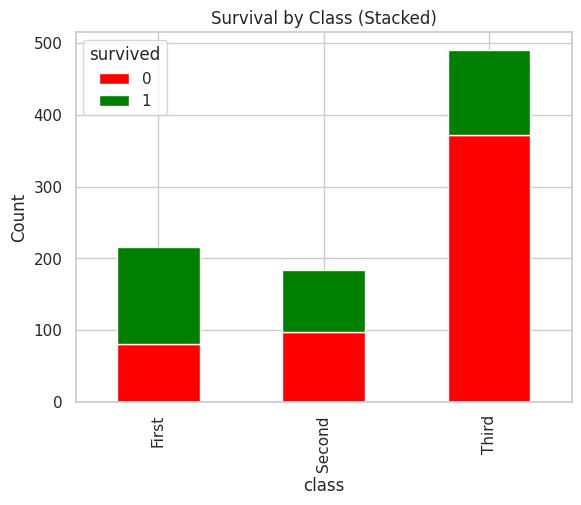

In [27]:
# 11. Stacked Bar Chart: Survival by Class
survival_class = titanic.groupby(['class', 'survived'])['survived'].count().unstack()
survival_class.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.title("Survival by Class (Stacked)")
plt.ylabel("Count")
plt.show()

/tmp/ipykernel_2238/1185726482.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='class', y='fare', data=titanic, palette='muted')


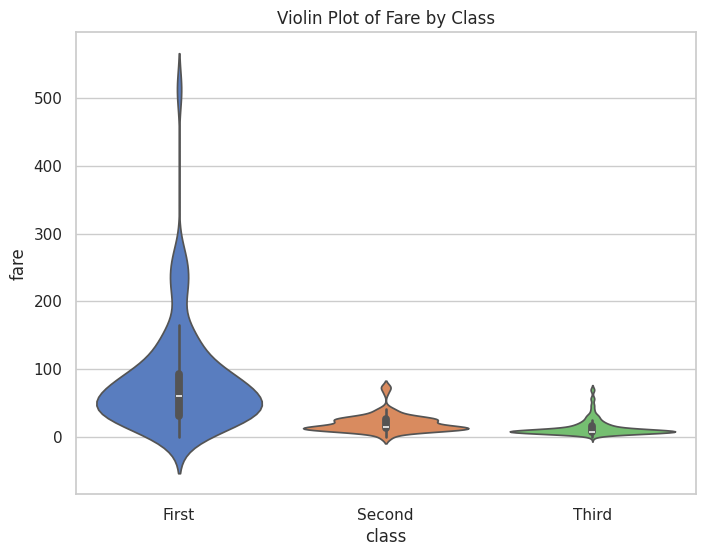

In [28]:
# 12. Violin Plot of Fare by Class
plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='fare', data=titanic, palette='muted')
plt.title("Violin Plot of Fare by Class")
plt.show()

/tmp/ipykernel_2238/3917203276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='survived', y='age', data=titanic, palette='Set1')


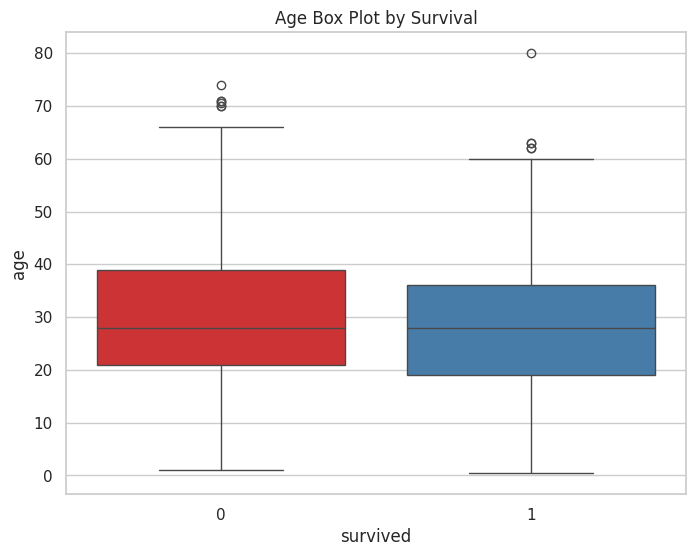

In [29]:
# 13. Age Box Plot by Survival
plt.figure(figsize=(8, 6))
sns.boxplot(x='survived', y='age', data=titanic, palette='Set1')
plt.title("Age Box Plot by Survival")
plt.show()

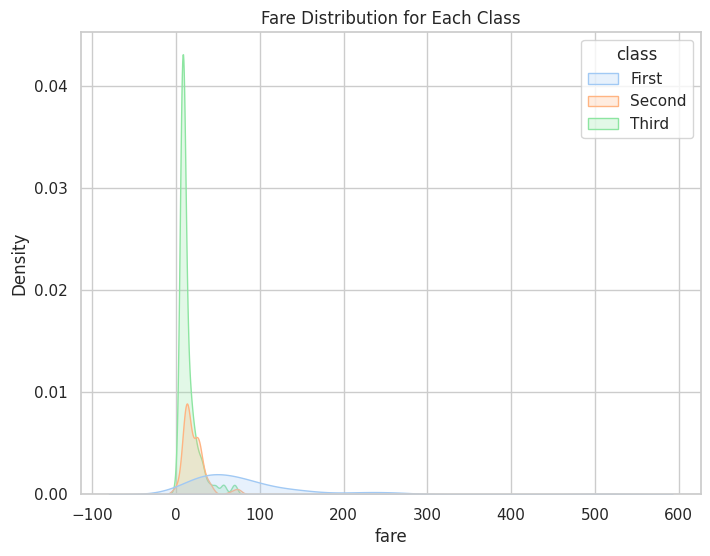

In [30]:
# 14. Fare Distribution for Each Class
plt.figure(figsize=(8, 6))
sns.kdeplot(data=titanic, x="fare", hue="class", fill=True, palette='pastel')
plt.title("Fare Distribution for Each Class")
plt.show()

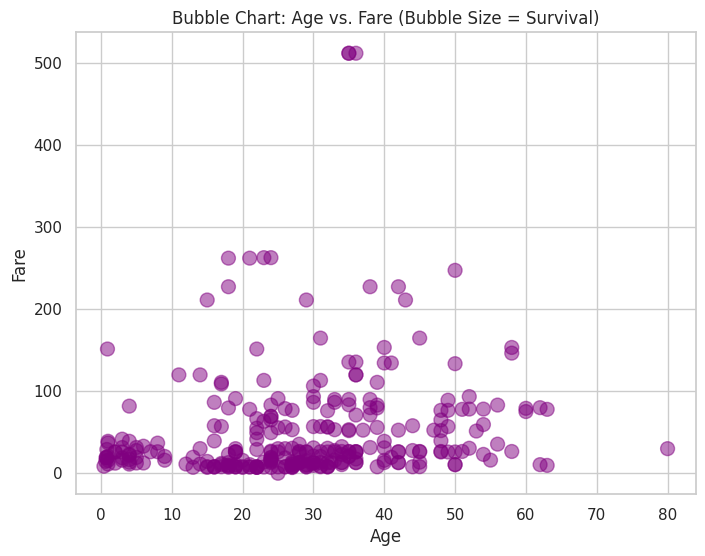

In [31]:
# 18. Bubble Chart: Age vs. Fare with Survival Size
plt.figure(figsize=(8, 6))
plt.scatter(titanic['age'], titanic['fare'], s=titanic['survived'] * 100, alpha=0.5, c='purple')
plt.title("Bubble Chart: Age vs. Fare (Bubble Size = Survival)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

<div style="background-color:rgb(255, 255, 0); padding: 10px; border: 1px solid #ddd;">
  <p style="color:rgb(0, 0, 0);"><b>ML PLOTS</b></p>
</div>

### ============ Machine Learning==================

1. Confusion matrix
2. Feature importance
3. Learning Curve
4. ROC
5. AUC
6. Precision-Recall
7. Cross-Validation Scores
8. Decision Boundary
9. Residual Plot
10. Distribution of predicitons
11. Model Comparision


### ============ Deep Learning==================

1. Training & Validation Loss
2. Training & Validation Accuracy


### ============ NLP PLOTS ==================

1. WordCloud
2. POS TAG
3. NER
4. Sentence Length Distribution
5. TF-IDF Heatmap
6. Sentiment Analysis results


In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_iris
import numpy as np

# Load dataset (for example, Iris dataset)
data = load_iris()
X = data.data
y = data.target
y = (y == 0).astype(int)  # Binary classification: class 0 vs others

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

### ------------------------
###### y_test: actual labels
###### y_pred: predicted labels
### ------------------------

In [37]:
features = data.feature_names
features


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [38]:
importances = model.feature_importances_
importances

array([0.13326043, 0.01093797, 0.42372581, 0.43207579])

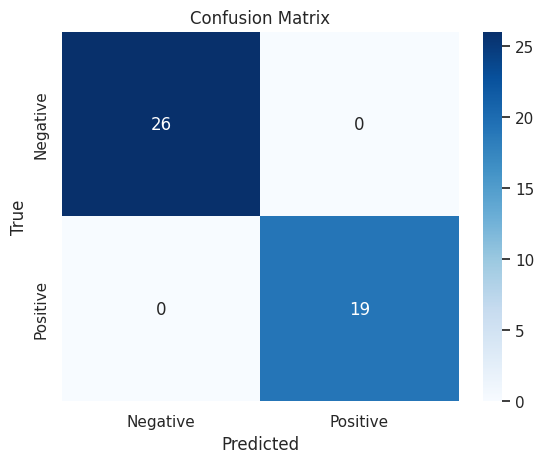

In [40]:
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()
    
plot_confusion_matrix(y_test,y_pred)

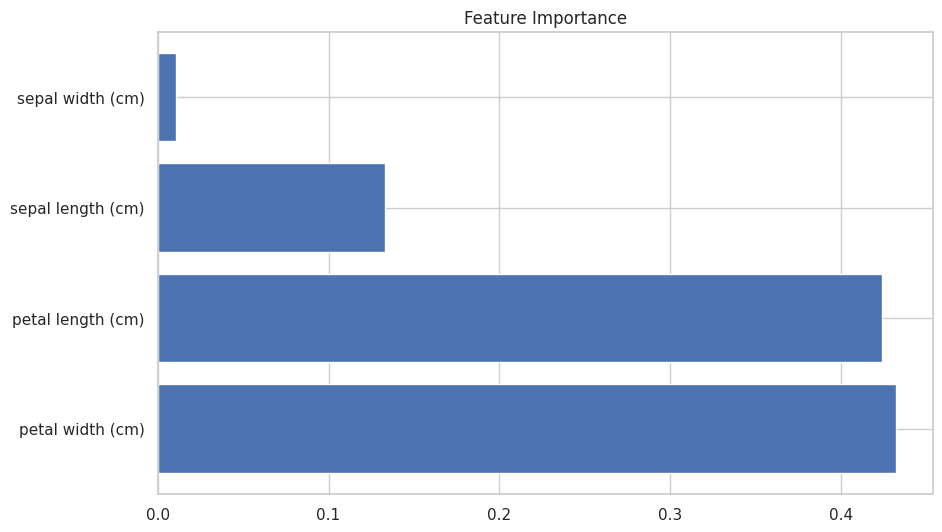

In [42]:
# 2. Feature Importance
def plot_feature_importance(model):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(10, 6))
    plt.barh(range(X.shape[1]), importances[indices], align='center')
    plt.yticks(range(X.shape[1]), np.array(data.feature_names)[indices])
    plt.title('Feature Importance')
    plt.show()
    
plot_feature_importance(model)

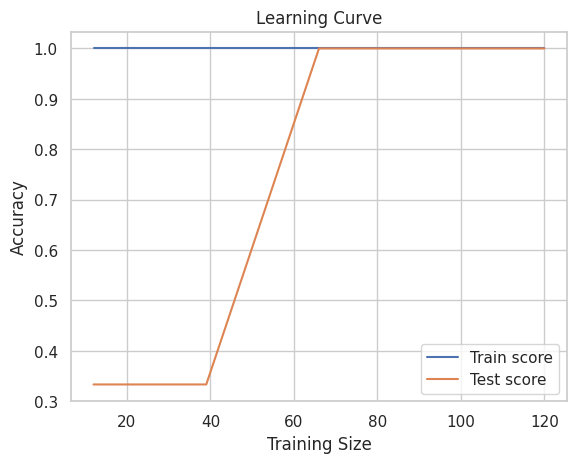

In [43]:
# 3. Learning Curve
from sklearn.model_selection import learning_curve
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, scoring='accuracy', n_jobs=-1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Train score")
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Test score")
    plt.title("Learning Curve")
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
plot_learning_curve(model, X, y)

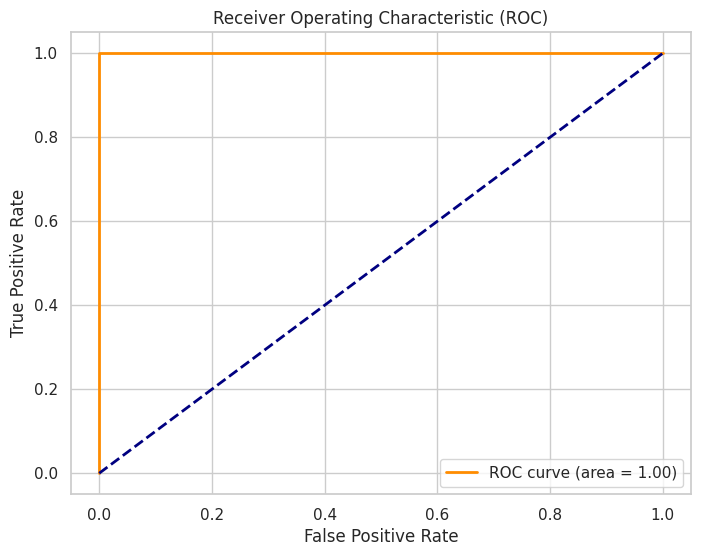

In [44]:
# 4. ROC Curve
def plot_roc_curve(y_true, y_pred):
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()
    
plot_roc_curve(y_test, y_pred)

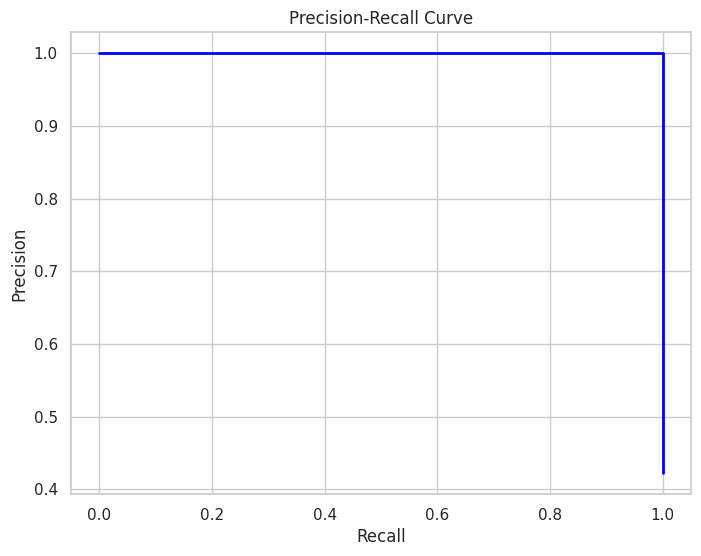

In [45]:
def plot_precision_recall_curve(y_true, y_pred):
    precision, recall, _ = precision_recall_curve(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, color='blue', lw=2)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.show()
    
plot_precision_recall_curve(y_test, y_pred)

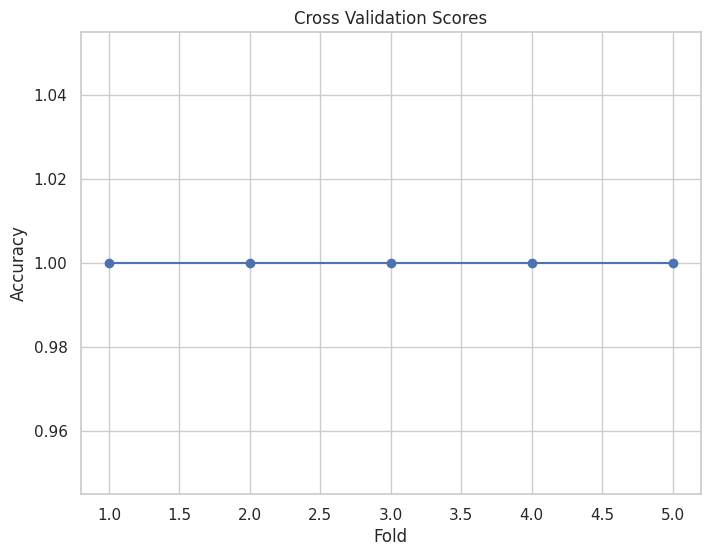

In [46]:
def plot_cross_val_scores(model, X, y):
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(cv_scores)+1), cv_scores, marker='o')
    plt.title('Cross Validation Scores')
    plt.xlabel('Fold')
    plt.ylabel('Accuracy')
    plt.show()
    
plot_cross_val_scores(model, X,y)

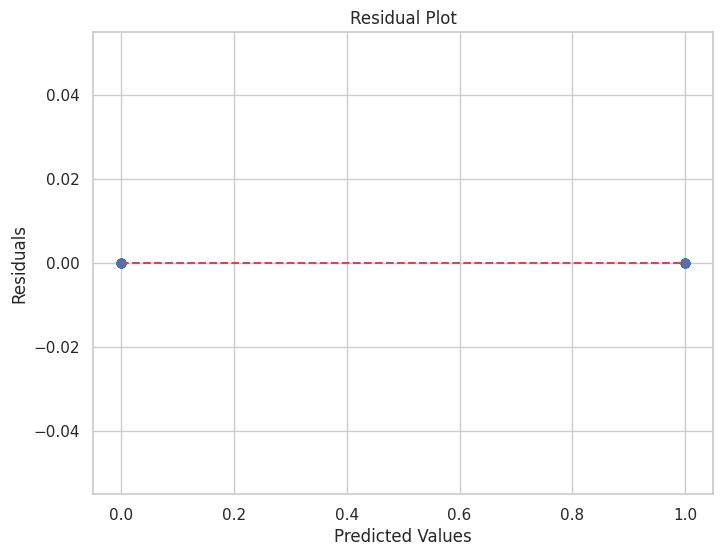

In [48]:
# 9. Residual Plot
from sklearn.metrics import mean_squared_error
def plot_residuals(y_true, y_pred):
    residuals = y_true - y_pred
    plt.figure(figsize=(8, 6))
    plt.scatter(y_pred, residuals)
    plt.hlines(y=0, xmin=min(y_pred), xmax=max(y_pred), colors='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()
plot_residuals(y_test, y_pred)

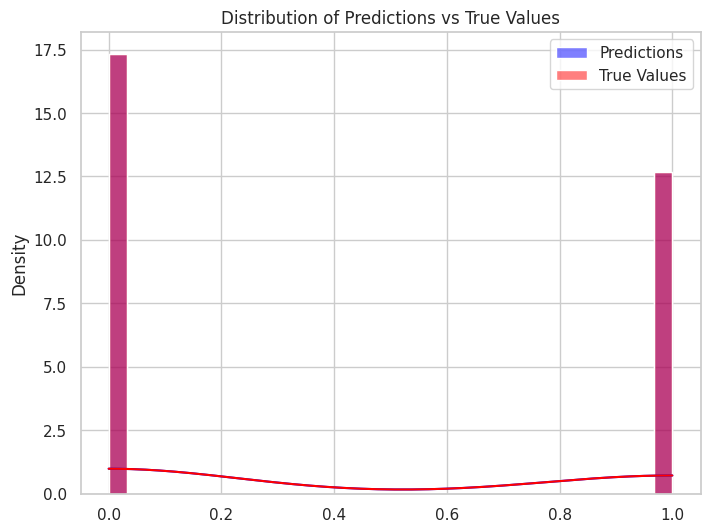

In [50]:
# 10. Distribution of Predictions
def plot_distribution_of_predictions(y_true, y_pred):
    plt.figure(figsize=(8, 6))
    sns.histplot(y_pred, kde=True, label="Predictions", color="blue", stat="density", bins=30)
    sns.histplot(y_true, kde=True, label="True Values", color="red", stat="density", bins=30)
    plt.legend()
    plt.title("Distribution of Predictions vs True Values")
    plt.show()
    
plot_distribution_of_predictions(y_test, y_pred)

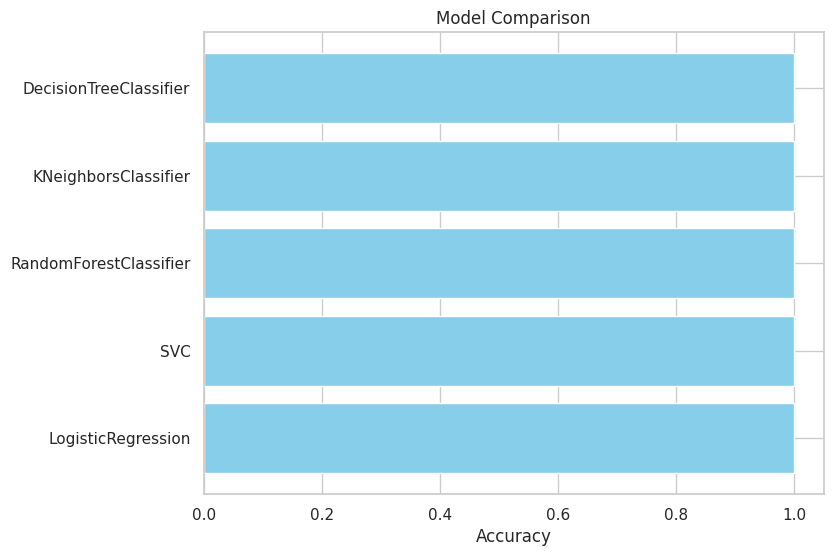

In [51]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# Function to plot model comparison
def plot_model_comparison(models, X_train, y_train, X_test, y_test):
    accuracies = []
    model_names = []
    
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))
        model_names.append(model.__class__.__name__)

    plt.figure(figsize=(8, 6))
    plt.barh(model_names, accuracies, color='skyblue')
    plt.title('Model Comparison')
    plt.xlabel('Accuracy')
    plt.show()

# Define models for comparison
models = [
    LogisticRegression(max_iter=1000),  # Logistic Regression
    SVC(kernel='linear', random_state=42),  # Support Vector Classifier
    RandomForestClassifier(random_state=42),  # Random Forest Classifier
    KNeighborsClassifier(),  # K-Nearest Neighbors
    DecisionTreeClassifier(random_state=42)  # Decision Tree Classifier
]

# Assuming you have your train and test data
# X_train, X_test, y_train, y_test should be defined earlier in your code

# Call the comparison function
plot_model_comparison(models, X_train, y_train, X_test, y_test)
